In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
data=pd.read_csv("Transformed_Housing_Data2.csv")

In [ ]:
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
data["mean_sales"]=data['Sale_Price'].mean()

In [ ]:
data.mean_sales.head()

0    511618.558147
1    511618.558147
2    511618.558147
3    511618.558147
4    511618.558147
Name: mean_sales, dtype: float64

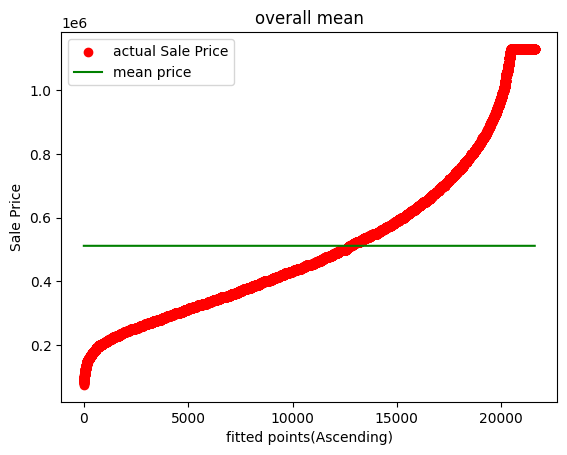

In [ ]:
plt.figure(dpi=100)
k=range(0,len(data))
plt.scatter(k,data["Sale_Price"].sort_values(),color="r",label="actual Sale Price")
plt.plot(k,data["mean_sales"].sort_values(),color="g",label="mean price")
plt.xlabel("fitted points(Ascending)")
plt.ylabel("Sale Price")
plt.title("overall mean")
plt.legend()

In [ ]:
grades_mean = data.pivot_table(values="Sale_Price",columns="Overall Grade",aggfunc=np.mean)
grades_mean

Overall Grade,1,2,3,4,5,6,7,8,9,10
Sale_Price,142000.0,1129575.0,205666.666667,214381.034483,248523.971074,301882.01472,402239.619779,537584.082097,736936.769025,960408.078866


In [ ]:
data.columns

Index(['Sale_Price', 'No of Bedrooms', 'No of Bathrooms',
       'Flat Area (in Sqft)', 'Lot Area (in Sqft)', 'No of Floors',
       'No of Times Visited', 'Overall Grade',
       'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
       'Age of House (in Years)', 'Latitude', 'Longitude',
       'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)', 'Years Since Renovation',
       'Condition_of_the_House_Excellent', 'Condition_of_the_House_Fair',
       'Condition_of_the_House_Good', 'Condition_of_the_House_Okay',
       'Ever_Renovated_Yes', 'Waterfront_View_Yes',
       'Zipcode_Group_Zipcode_Group_1', 'Zipcode_Group_Zipcode_Group_2',
       'Zipcode_Group_Zipcode_Group_3', 'Zipcode_Group_Zipcode_Group_4',
       'Zipcode_Group_Zipcode_Group_5', 'Zipcode_Group_Zipcode_Group_6',
       'Zipcode_Group_Zipcode_Group_7', 'Zipcode_Group_Zipcode_Group_8',
       'Zipcode_Group_Zipcode_Group_9', 'mean_sales'],
      dtype='object')

In [ ]:
condition=data.pivot_table(values="Sale_Price",columns=['Condition_of_the_House_Excellent', 'Condition_of_the_House_Fair',
       'Condition_of_the_House_Good', 'Condition_of_the_House_Okay'],aggfunc=np.mean)

In [ ]:
view=data.pivot_table(values="Sale_Price",columns=["Waterfront_View_Yes"],aggfunc=np.mean)

<Axes: xlabel='No of Floors', ylabel='Sale_Price'>

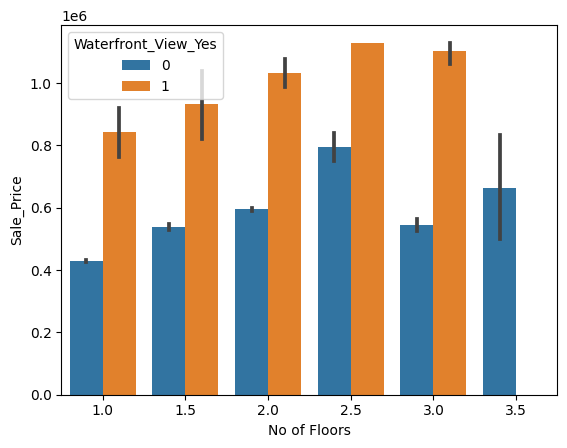

In [ ]:
sns.barplot(data,x="No of Floors",y="Sale_Price",hue="Waterfront_View_Yes")

In [ ]:
grades_mean = data.pivot_table(values="Sale_Price",columns="Overall Grade",aggfunc=np.mean)
grades_mean


Overall Grade,1,2,3,4,5,6,7,8,9,10
Sale_Price,142000.0,1129575.0,205666.666667,214381.034483,248523.971074,301882.01472,402239.619779,537584.082097,736936.769025,960408.078866


In [ ]:
data["grade_mean"]=0
for i in grades_mean.columns:
  data["grade_mean"][data["Overall Grade"]==i]=grades_mean[i][0]
data["grade_mean"]

<ipython-input-13-f1abc40b5984>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["grade_mean"][data["Overall Grade"]==i]=grades_mean[i][0]


0        402239.619779
1        402239.619779
2        301882.014720
3        402239.619779
4        537584.082097
             ...      
21604    537584.082097
21605    537584.082097
21606    402239.619779
21607    537584.082097
21608    402239.619779
Name: grade_mean, Length: 21609, dtype: float64

In [ ]:
data

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9,mean_sales,grade_mean
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,511618.558147,402239.619779
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,1,0,0,0,0,0,0,0,511618.558147,402239.619779
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,1,0,0,0,0,0,0,0,511618.558147,301882.014720
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,1,0,0,0,0,0,0,511618.558147,402239.619779
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,1,0,0,0,0,0,511618.558147,537584.082097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21604,360000.0,3,2.50,1530.0,1131.0,3.0,0,8,1530.0,0,...,0,1,0,0,0,0,0,0,511618.558147,537584.082097
21605,400000.0,4,2.50,2310.0,5813.0,2.0,0,8,2310.0,0,...,0,0,0,0,0,0,0,0,511618.558147,537584.082097
21606,402101.0,2,0.75,1020.0,1350.0,2.0,0,7,1020.0,0,...,0,1,0,0,0,0,0,0,511618.558147,402239.619779
21607,400000.0,3,2.50,1600.0,2388.0,2.0,0,8,1600.0,0,...,0,0,1,0,0,0,0,0,511618.558147,537584.082097


In [ ]:
data.grade_mean.unique()

array([ 402239.61977949,  301882.01472031,  537584.08209693,
        960408.0788663 ,  736936.76902486,  248523.97107438,
        214381.03448276,  205666.66666667, 1129575.        ,
        142000.        ])

In [ ]:
data["Overall Grade"].unique()

array([ 7,  6,  8, 10,  9,  5,  4,  3,  2,  1])

In [ ]:
mean_diffrence=data['mean_sales']-data["Sale_Price"]

In [ ]:
grade_mean_diffrence=data["grade_mean"]-data["Sale_Price"]

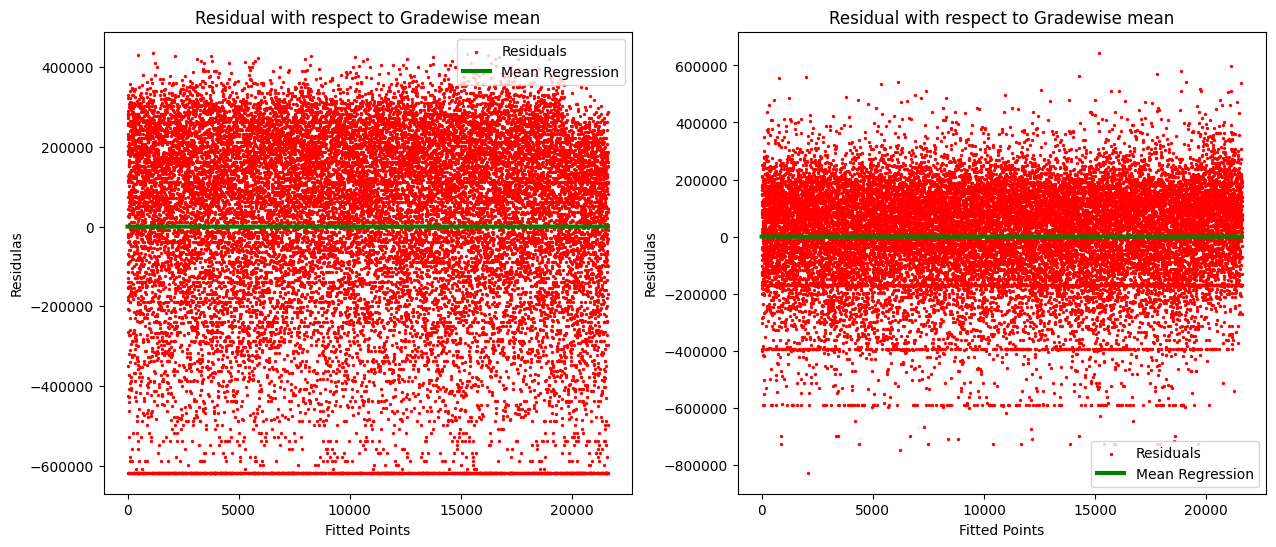

In [ ]:
k=range(0,len(data))
l=[0 for i in range(len(data))]
plt.figure(figsize=(15,6),dpi=100)
plt.subplot(1,2,1)
plt.scatter(k,mean_diffrence,color="r",label="Residuals",s=2)
plt.plot(k,l,color="green",label="Mean Regression",linewidth=3)
plt.xlabel("Fitted Points")
plt.ylabel("Residulas")
plt.title("Residual with respect to Gradewise mean")
plt.legend()

plt.subplot(1,2,2)
plt.scatter(k,grade_mean_diffrence,color="red",label="Residuals",s=2)
plt.plot(k,l,color="g",label="Mean Regression",linewidth=3)
plt.xlabel("Fitted Points")
plt.ylabel("Residulas")
plt.legend()
plt.title("Residual with respect to Gradewise mean")
plt.legend(loc=4)

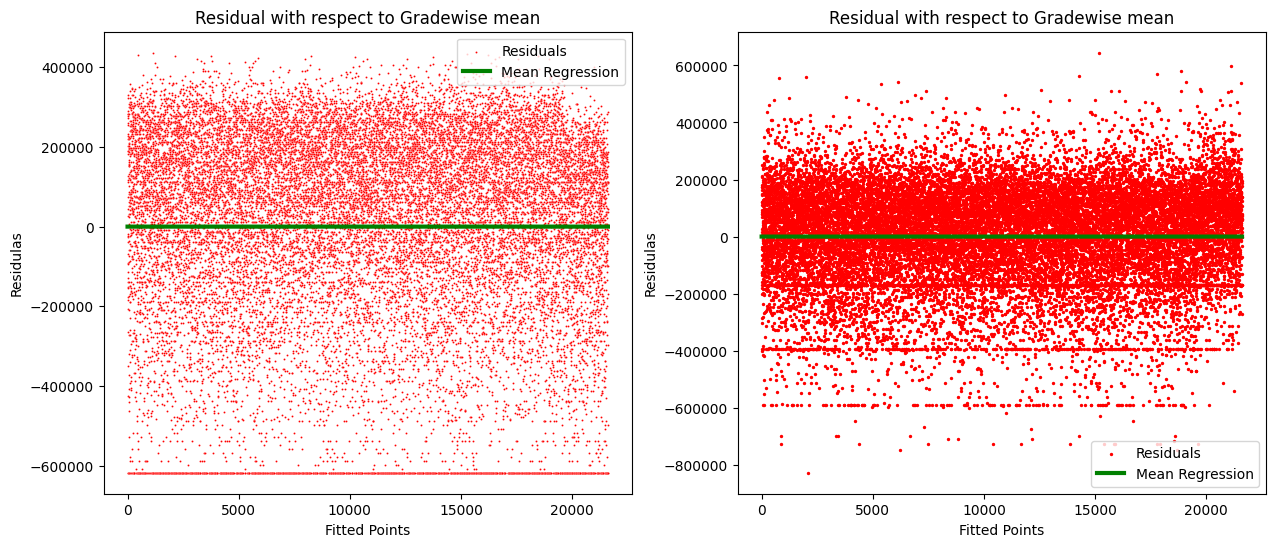

In [ ]:
k=range(0,len(data))
l=[0 for i in range(len(data))]
plt.figure(figsize=(15,6),dpi=100)
plt.subplot(1,2,1)
sns.scatterplot(x=k,y=mean_diffrence,color="r",label="Residuals",s=2)
sns.lineplot(x=k,y=l,color="green",label="Mean Regression",linewidth=3)
plt.xlabel("Fitted Points")
plt.ylabel("Residulas")
plt.title("Residual with respect to Gradewise mean")
plt.legend()

plt.subplot(1,2,2)
plt.scatter(x=k,y=grade_mean_diffrence,color="red",label="Residuals",s=2)
sns.lineplot(x=k,y=l,color="g",label="Mean Regression",linewidth=3)
plt.xlabel("Fitted Points")
plt.ylabel("Residulas")
plt.legend()
plt.title("Residual with respect to Gradewise mean")
plt.legend(loc=4)

In [ ]:
view_mean=pd.pivot_table(data,values="Sale_Price",columns=['Waterfront_View_Yes'],aggfunc=np.mean)
view_mean

Waterfront_View_Yes,0,1
Sale_Price,508220.056467,958761.300613


In [ ]:
#data["waterfront_mean"]=0
#for i in view_mean.columns:
  #data["waterfront_mean"][data["Waterfront_View_Yes"]==i]=view_mean[1][0]

In [ ]:
#data["waterfront_mean"].head()

In [ ]:
#mean_diffrence=data['mean_sales']-data["Sale_Price"]

In [ ]:
#waterfront_mean_diffrence=data["waterfront_mean"]-data["Sale_Price"]

In [ ]:
cost=sum(mean_diffrence)/len(data)
print(round(cost,7))

0.0


In [ ]:
Y=data["Sale_Price"]
Y_hat1=data["mean_sales"]
Y_hat2=data["grade_mean"]
n=len(data)
len(Y),len(Y_hat1),len(Y_hat2),n

(21609, 21609, 21609, 21609)

Mean Aboloute Error
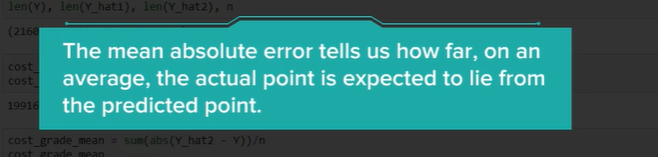

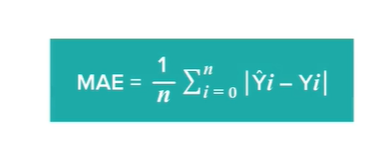

In [ ]:
cost_mean=sum(abs(Y_hat1-Y))/n
cost_mean

199168.78146839526

In [ ]:
cost_grade=sum(abs(Y_hat2-Y))/n
cost_grade

137081.70298203363

In [ ]:
from sklearn.metrics import mean_absolute_error as msa

In [ ]:
cost_grade_mean=msa(Y_hat2,Y)

In [ ]:
cost_grade_mean

137081.7029820291

Mean Squred Error
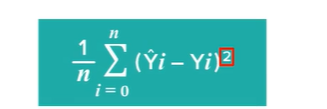

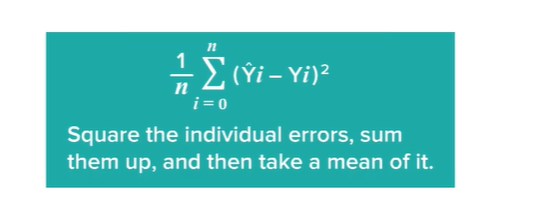

In [ ]:
from sklearn.metrics import mean_squared_error as mse

In [ ]:
cost_mean=mse(Y_hat1,Y)
cost_grade_mean=mse(Y_hat2,Y)
cost_mean,cost_grade_mean

(62528116847.799576, 30804835720.342426)

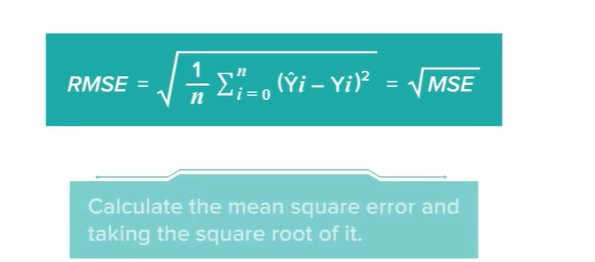

In [ ]:
cost_mean=mse(Y_hat1,Y)**0.5
cost_grade_mean=mse(Y_hat2,Y)**0.5
cost_mean,cost_grade_mean

(250056.2273725643, 175513.06424406826)

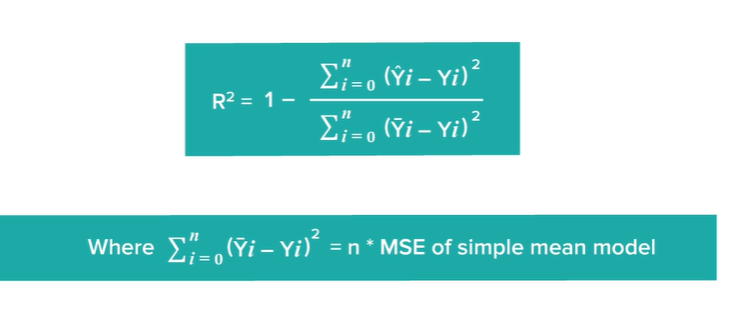

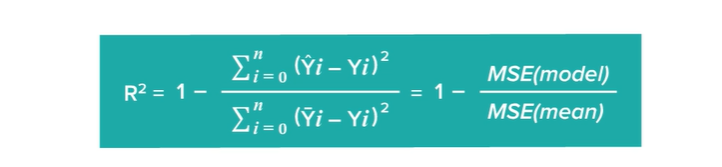

In [ ]:
Y=data["Sale_Price"]
Y_bar=data["mean_sales"]
Y_hat=data["grade_mean"]
n=len(data)

In [ ]:
mse_mean=mse(Y_bar,Y)
mse_mean

62528116847.799576

In [ ]:
mse_model=mse(Y_hat,Y)
mse_model

30804835720.342426

In [ ]:
R2=1-(mse_model/mse_mean)

In [ ]:
R2

0.5073442592981836

In [ ]:
sale_price=data["Sale_Price"].head(30)
flat_area=data["Flat Area (in Sqft)"].head(30)
sample_data=pd.DataFrame({"sale_price":sale_price,'flat_area':flat_area})
sample_data

,sale_price,flat_area
0,221900.0,1180.0
1,538000.0,2570.0
2,180000.0,770.0
3,604000.0,1960.0
4,510000.0,1680.0
5,1129575.0,5420.0
6,257500.0,1715.0
7,291850.0,1060.0
8,229500.0,1780.0
9,323000.0,1890.0


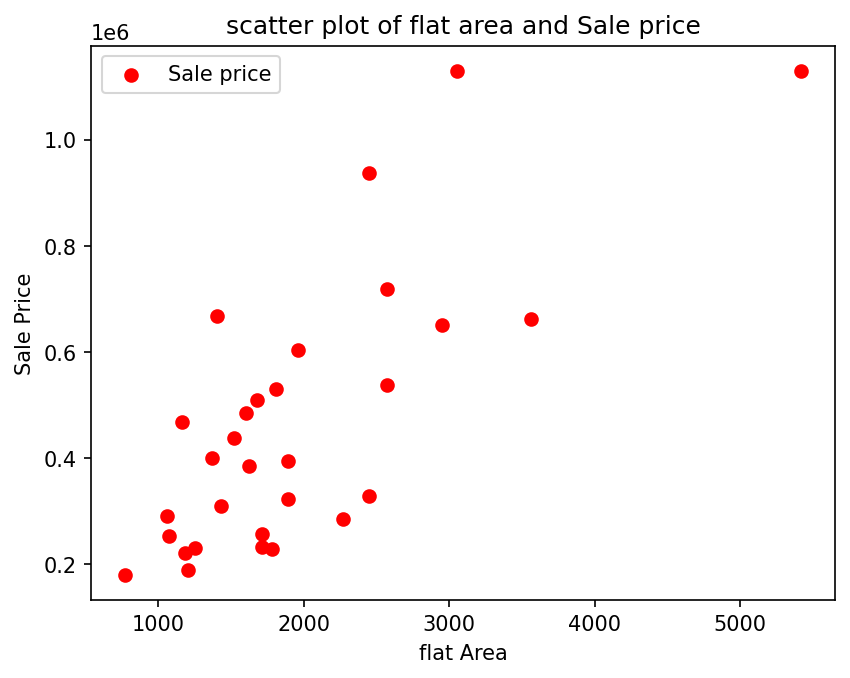

In [ ]:
plt.figure(dpi=150)
plt.scatter(sample_data.flat_area,sample_data.sale_price,color="r",label="Sale price")
plt.xlabel("flat Area")
plt.ylabel("Sale Price")
plt.title("scatter plot of flat area and Sale price")
plt.legend()


In [ ]:
sample_data["mean_sale"]=sample_data["sale_price"].mean()

In [ ]:
sample_data

,sale_price,flat_area,mean_sale
0,221900.0,1180.0,466003.333333
1,538000.0,2570.0,466003.333333
2,180000.0,770.0,466003.333333
3,604000.0,1960.0,466003.333333
4,510000.0,1680.0,466003.333333
5,1129575.0,5420.0,466003.333333
6,257500.0,1715.0,466003.333333
7,291850.0,1060.0,466003.333333
8,229500.0,1780.0,466003.333333
9,323000.0,1890.0,466003.333333


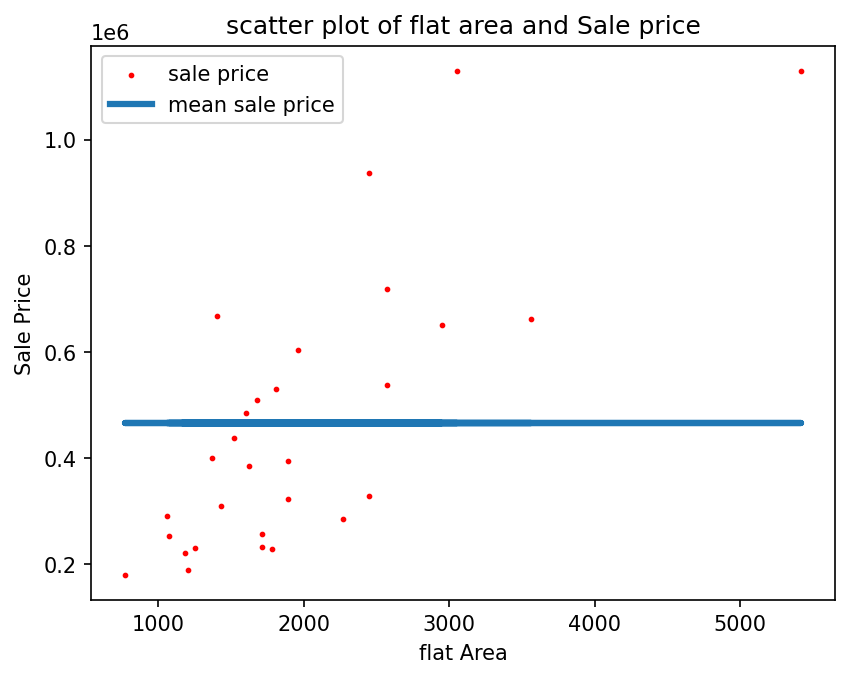

In [ ]:
plt.figure(dpi=150)
plt.scatter(sample_data.flat_area,sample_data.sale_price,s=3,color="r",label="sale price")
plt.plot(sample_data.flat_area,sample_data.mean_sale,linewidth=3,label="mean sale price")
plt.xlabel("flat Area")
plt.ylabel("Sale Price")
plt.title("scatter plot of flat area and Sale price")
plt.legend()


In [ ]:
sample_data

,sale_price,flat_area,mean_sale
0,221900.0,1180.0,466003.333333
1,538000.0,2570.0,466003.333333
2,180000.0,770.0,466003.333333
3,604000.0,1960.0,466003.333333
4,510000.0,1680.0,466003.333333
5,1129575.0,5420.0,466003.333333
6,257500.0,1715.0,466003.333333
7,291850.0,1060.0,466003.333333
8,229500.0,1780.0,466003.333333
9,323000.0,1890.0,466003.333333


Text(0.5, 1.0, 'slope 200with mse 33315814783.333332')

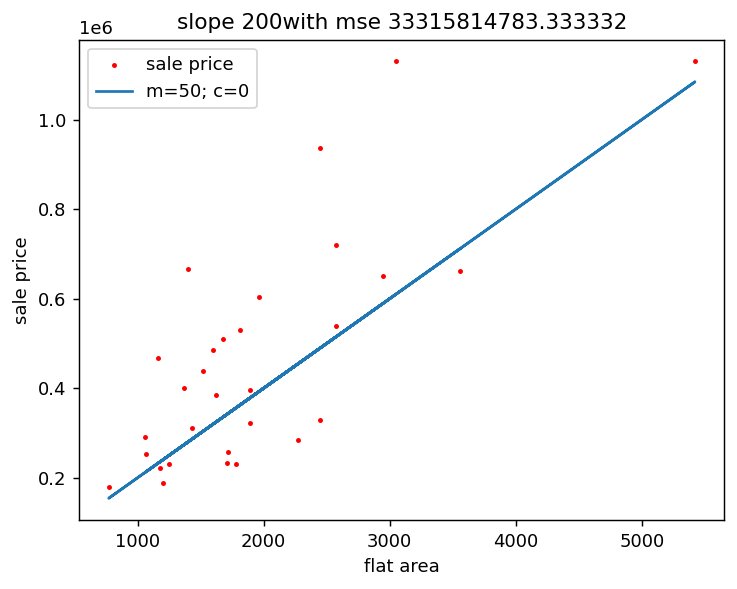

In [ ]:
c=5
m=200
line=[]
for i in range(len(sample_data)):
  line.append(sample_data.flat_area[i]* m + c)
plt.figure(dpi=130)
plt.scatter(sample_data.flat_area,sample_data.sale_price,color="r",s=3,label="sale price")
plt.plot(sample_data["flat_area"],line,label= "m=50; c=0")
plt.xlabel("flat area")
plt.ylabel("sale price")
plt.legend()
MSE=mse(sample_data.sale_price,line)
plt.title("slope "+str(m)+"with mse "+ str(MSE))


In [ ]:
def slope_Error(slope,intercept,sample_data):
  sale=[]
  for i in range(len(sample_data.flat_area)):
    tmp=sample_data.flat_area[i] * slope +intercept
    sale.append(tmp)
  MSE=mse(sample_data.sale_price,sale)
  return MSE


In [ ]:
MSE

33315814783.333332

In [ ]:
slope=[i/10 for i in range(0,5000)]
Cost=[]
for i in slope:
  cost=slope_Error(slope=i, intercept=10834, sample_data = sample_data)
  Cost.append(cost)

In [ ]:
#arranging in Data Frame
cost_table=pd.DataFrame({"slope":slope,"Cost":Cost})

In [ ]:
cost_table.tail()

,slope,Cost
4995,499.5,3.636767e+11
4996,499.6,3.639259e+11
4997,499.7,3.641751e+11
4998,499.8,3.644245e+11
4999,499.9,3.646739e+11


<Axes: xlabel='slope', ylabel='Cost'>

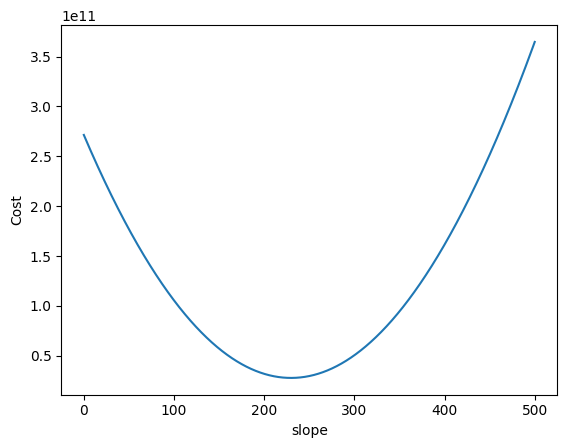

In [ ]:
sns.lineplot(x=cost_table.slope,y=cost_table.Cost)

In [ ]:
def intercept_Error(slope,intercept,sample_data):
  sale=[]
  for i in range(len(sample_data.flat_area)):
    tmp=sample_data.flat_area[i] * slope +intercept
    sale.append(tmp)
  MSE=mse(sample_data.sale_price,sale)
  return MSE

In [ ]:
intercept=[i for i in range(5000,50000)]
Cost=[]
for i in intercept:
  cost=intercept_Error(slope=234, intercept=i, sample_data = sample_data)
  Cost.append(cost)

In [ ]:
cost_table=pd.DataFrame({"intercept":intercept,"Cost":Cost})
cost_table

,intercept,Cost
0,5000,2.779911e+10
1,5001,2.779909e+10
2,5002,2.779908e+10
3,5003,2.779907e+10
4,5004,2.779906e+10
...,...,...
44995,49995,2.929862e+10
44996,49996,2.929870e+10
44997,49997,2.929878e+10
44998,49998,2.929886e+10


<Axes: xlabel='intercept', ylabel='Cost'>

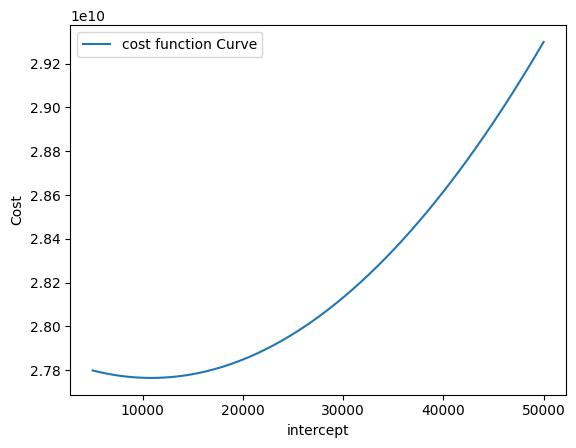

In [ ]:
sns.lineplot(x=cost_table.intercept,y=cost_table.Cost,label="cost function Curve")

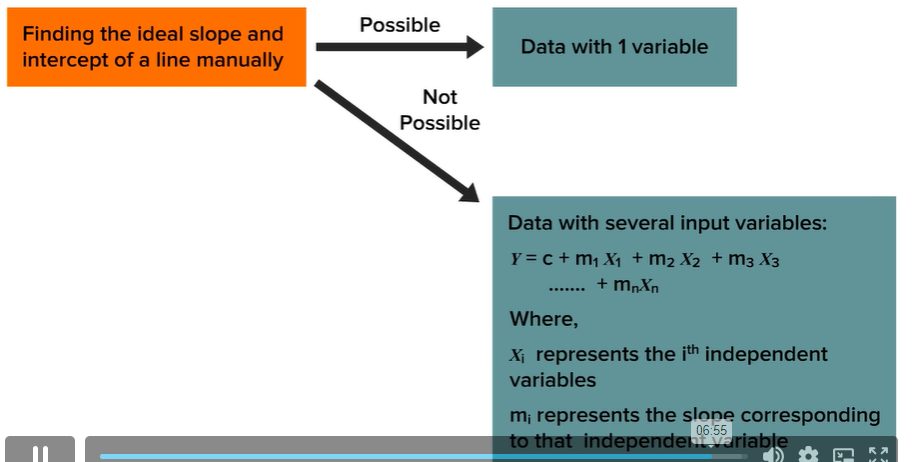

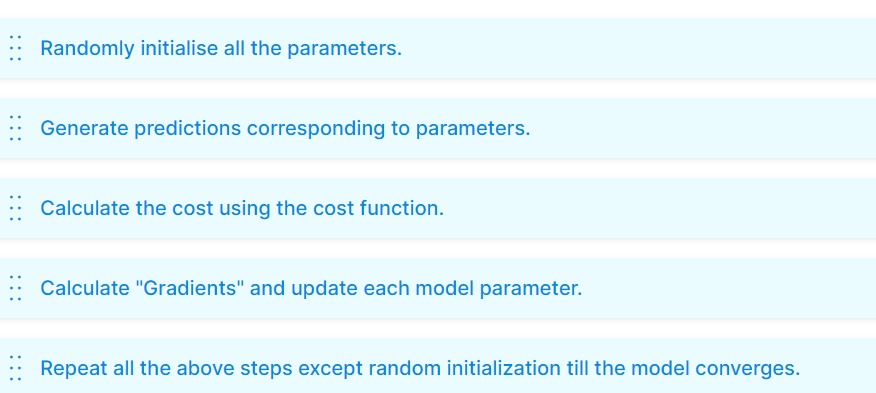

implemebting Gradient Decent

Step 1 intilize parameters

In [ ]:
def param_init(Y):
  '''Y= target Variable returns initilized values of m and c'''
  m=0.1
  c=Y.mean()
  return m,c


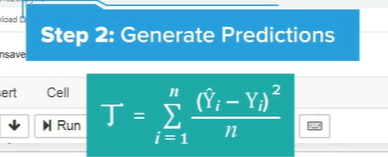 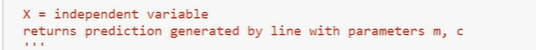

In [ ]:
def generate_predictions(m,c,X):

   prediction=[]
   for x in X:
     pred=(m*x)+c
     prediction.append(pred)
   return prediction

step 3
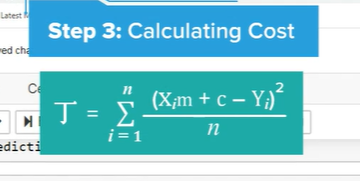

In [ ]:
def compute_cost(prediction, Y):
  '''
  returns the mean_squared_error between prediction and Y
  '''
  cost = np.sum(((prediction - Y)**2)/len(Y))
  return cost

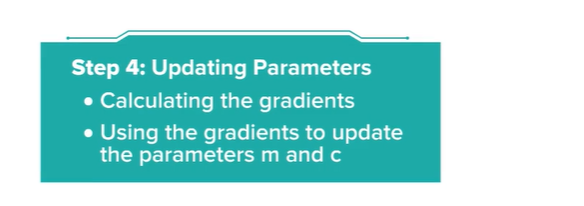

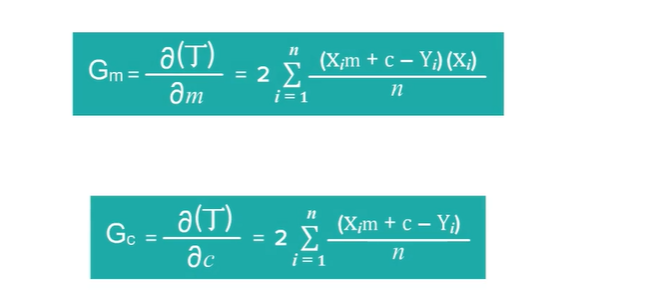

In [ ]:
def gradients(prediction, Y, X):
  '''
  Returns Gradients corresponding to m and c
  '''
  n = len(Y)
  Gm = 2/n * np.sum((prediction - Y) * X)
  Gc = 2/n * np.sum((prediction - Y))
  return Gm, Gc

updating Parameters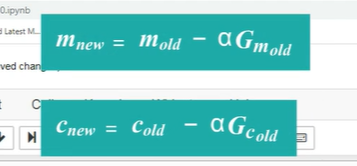

In [ ]:
def param_update(m_old , c_old , Gm_old, Gc_old, alpha):
  '''
  Update and return the new values of m and c
  '''
  m_new = m_old - alpha * Gm_old
  c_new = c_old - alpha * Gc_old
  return m_new, c_new

disply Result


In [ ]:
def result(m, c, X, Y, cost, predictions, i):
  '''
  Print and plot the final result obtained from gradient descent
  '''
  ##If the Gradient Descent converged to the optimum value before max_iter
  if i < max_iter - 1 :
    print("***** Gradient Descent has converged at iteration {} *****".format(i))
  else:
    print("***** Result after", max_iter,'iterations is: *****')

  ## plotting the final result
  plt.figure(figsize = (14,7), dpi = 120)
  plt.scatter(X, Y, color = 'red', label = 'data points')
  label = 'final regression line: m = {}; c = {}'.format(str(m), str(c))
  plt.plot(X, predictions, color = 'green', label = label)
  plt.xlabel('flat_area')
  plt.ylabel('sale_price')
  plt.title('final regression line')

  plt.legend()

After Iteration 0 : m = 3499072.307222223 ; c = 465999.44299999997 ; Cost = 64177937552.075005
After Iteration 20 : m = 7.115927055971628e+105 ; c = 2.997778392048355e+102 ; Cost = 2.7417231010181384e+208
After Iteration 40 : m = 1.447154337383132e+205 ; c = 6.096532424296826e+201 ; Cost = inf
After Iteration 60 : m = 2.9430538842431367e+304 ; c = 1.2398417341018387e+301 ; Cost = inf
After Iteration 80 : m = nan ; c = nan ; Cost = nan
After Iteration 100 : m = nan ; c = nan ; Cost = nan
After Iteration 120 : m = nan ; c = nan ; Cost = nan
After Iteration 140 : m = nan ; c = nan ; Cost = nan
After Iteration 160 : m = nan ; c = nan ; Cost = nan
After Iteration 180 : m = nan ; c = nan ; Cost = nan
After Iteration 200 : m = nan ; c = nan ; Cost = nan
After Iteration 220 : m = nan ; c = nan ; Cost = nan
After Iteration 240 : m = nan ; c = nan ; Cost = nan
After Iteration 260 : m = nan ; c = nan ; Cost = nan
After Iteration 280 : m = nan ; c = nan ; Cost = nan
After Iteration 300 : m = nan ;

<ipython-input-60-acb1beabb3f3>:5: RuntimeWarning: overflow encountered in square
  cost = np.sum(((prediction - Y)**2)/len(Y))
<ipython-input-64-4120197461a8>:23: RuntimeWarning: invalid value encountered in double_scalars
  if abs(cost_new - cost_old) < 10**(-7):
<ipython-input-61-dc9ae21f287b>:6: RuntimeWarning: overflow encountered in multiply
  Gm = 2/n * np.sum((prediction - Y) * X)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-62-cd6674461602>:5: RuntimeWarning: invalid value encountered in double_scalars
  m_new = m_old - alpha * Gm_old
<ipython-input-62-cd6674461602>:6: RuntimeWarning: invalid value encountered in double_scalars
  c_new = c_old - alpha * Gc_old


 ; c = nan ; Cost = nan
After Iteration 560 : m = nan ; c = nan ; Cost = nan
After Iteration 580 : m = nan ; c = nan ; Cost = nan
After Iteration 600 : m = nan ; c = nan ; Cost = nan
After Iteration 620 : m = nan ; c = nan ; Cost = nan
After Iteration 640 : m = nan ; c = nan ; Cost = nan
After Iteration 660 : m = nan ; c = nan ; Cost = nan
After Iteration 680 : m = nan ; c = nan ; Cost = nan
After Iteration 700 : m = nan ; c = nan ; Cost = nan
After Iteration 720 : m = nan ; c = nan ; Cost = nan
After Iteration 740 : m = nan ; c = nan ; Cost = nan
After Iteration 760 : m = nan ; c = nan ; Cost = nan
After Iteration 780 : m = nan ; c = nan ; Cost = nan
After Iteration 800 : m = nan ; c = nan ; Cost = nan
After Iteration 820 : m = nan ; c = nan ; Cost = nan
After Iteration 840 : m = nan ; c = nan ; Cost = nan
After Iteration 860 : m = nan ; c = nan ; Cost = nan
After Iteration 880 : m = nan ; c = nan ; Cost = nan
After Iteration 900 : m = nan ; c = nan ; Cost = nan
After Iteration 920 : 

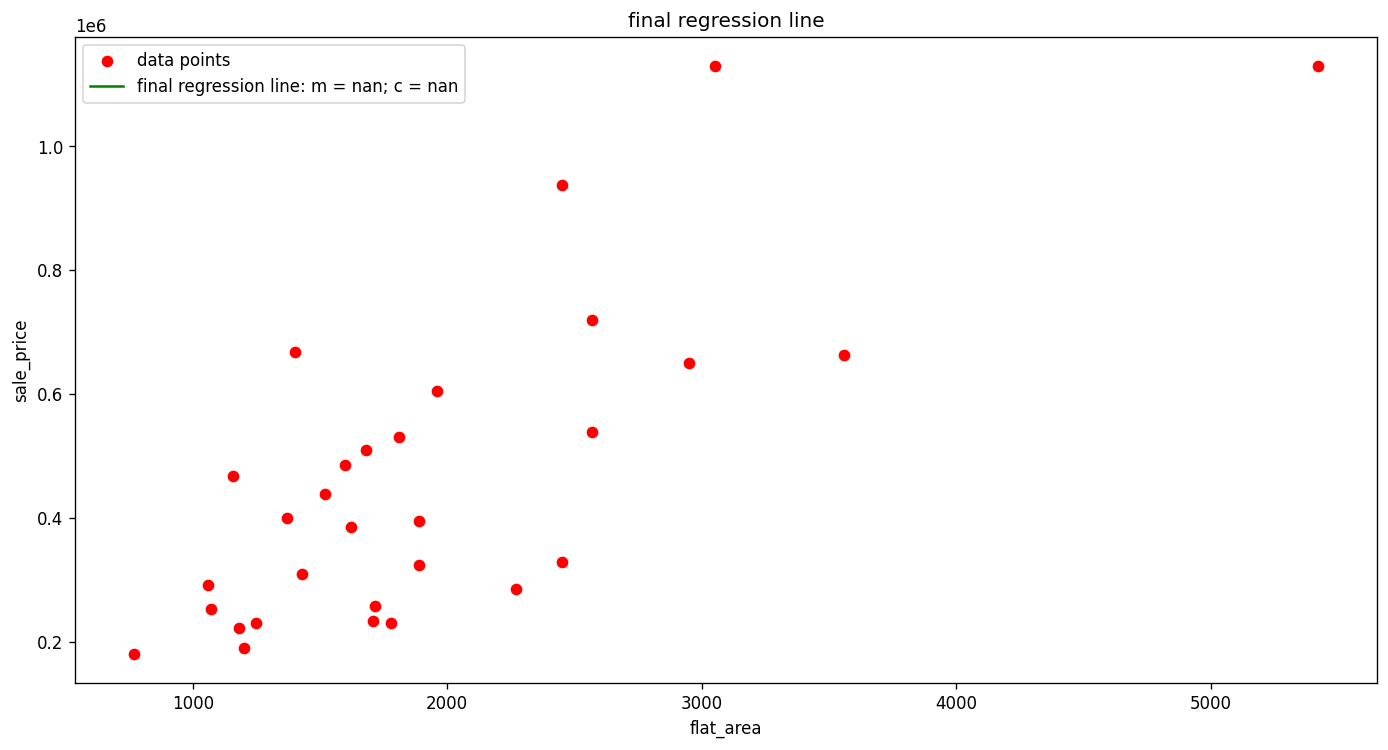

In [ ]:
## defining and reshaping the dataset
sale_price = sample_data['sale_price'].values.reshape(-1,1)
flat_area = sample_data['flat_area'].values.reshape(-1,1)

## declaring parameters
max_iter = 1000
cost_old = 0
alpha = 0.01

## Step 1: inititialising the values of m, c
m , c = param_init(sale_price)

## Gradient Descent in action
for i in range(0 , max_iter):

  ## Step 2: genrating predictions
  predictions = generate_predictions(m , c , flat_area)

  ## Step 3: calculating cost
  cost_new = compute_cost(predictions , sale_price)

  ## checking if GD converged
  if abs(cost_new - cost_old) < 10**(-7):
    break

  ## calculating gradients
  Gm, Gc = gradients(predictions, sale_price,
                     flat_area)

  ## Step 4: updating parameters m and c
  m, c = param_update(m, c, Gm, Gc, alpha)

  ## display result after every 20 iterations
  if i%20 == 0:
    print('After Iteration', i,': m =', m, '; c =', c,'; Cost =', cost_new)

  ##updating cost_old
  cost_old = cost_new

## final results
result(m , c, flat_area, sale_price,
       cost_new, predictions, i)

In [ ]:
sale_price.shape,flat_area.shape

((30, 1), (30, 1))

After Iteration 0 : m = 0.11316346413633305 ; c = 1.1849780416165836e-16 ; Cost = 0.85836535863667
After Iteration 20 : m = 0.3275595607435688 ; c = 1.240489192847842e-16 ; Cost = 0.6182472245590185
After Iteration 40 : m = 0.4706921039517346 ; c = 1.3248661427193537e-16 ; Cost = 0.5112264752046607
After Iteration 60 : m = 0.5662485308150865 ; c = 1.415904430738617e-16 ; Cost = 0.46352728398628984
After Iteration 80 : m = 0.6300427631414932 ; c = 1.4951003398285442e-16 ; Cost = 0.4422677351921283
After Iteration 100 : m = 0.6726323011945988 ; c = 1.611303683072644e-16 ; Cost = 0.4327923457067555
After Iteration 120 : m = 0.7010654163122192 ; c = 1.666074685620818e-16 ; Cost = 0.42856916078553225
After Iteration 140 : m = 0.7200475906265729 ; c = 1.6660746856208182e-16 ; Cost = 0.4266868855601835
After Iteration 160 : m = 0.7327202415200801 ; c = 1.669405354694694e-16 ; Cost = 0.42584795473189874
After Iteration 180 : m = 0.7411806042798547 ; c = 1.6694053546946945e-16 ; Cost = 0.425474

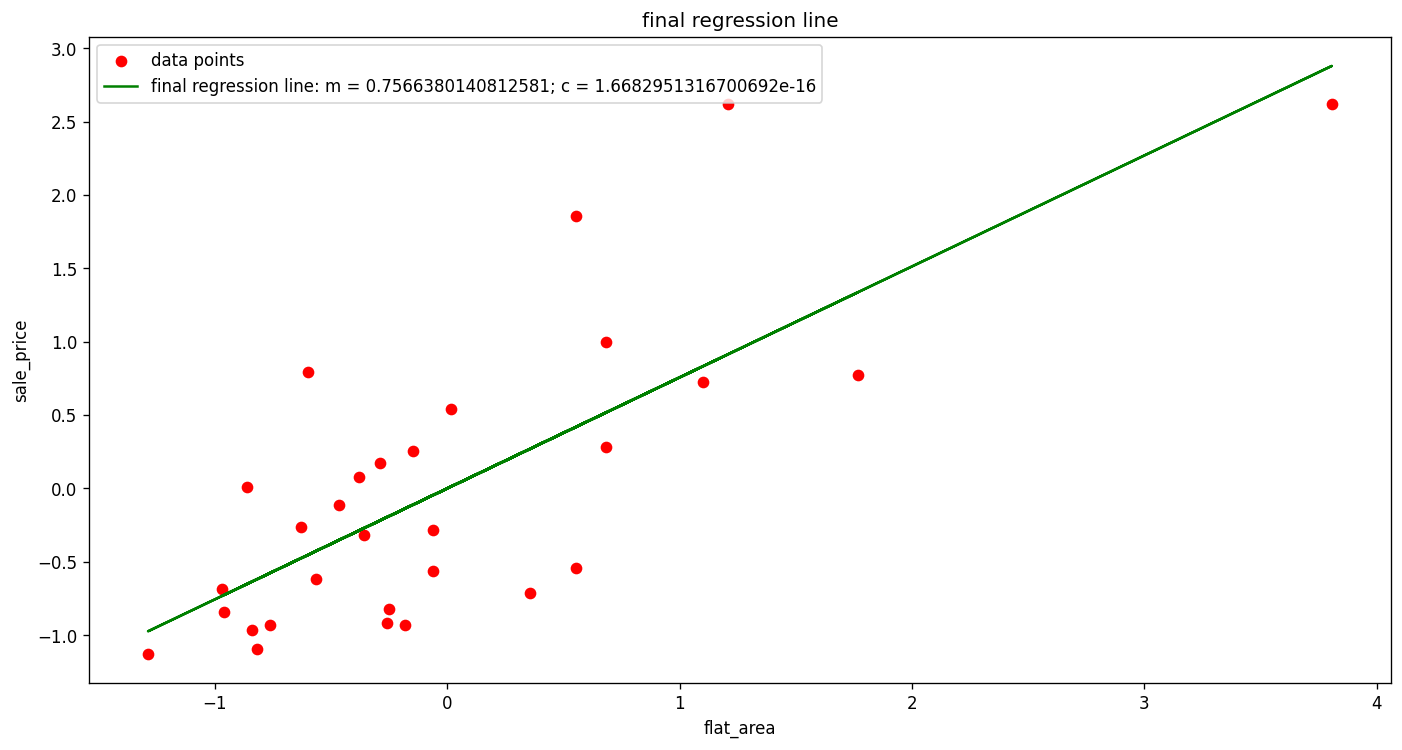

In [ ]:
## scaling the dataset using the standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sale_price = scaler.fit_transform(sample_data['sale_price'].values.reshape(-1,1))
flat_area = scaler.fit_transform(sample_data['flat_area'].values.reshape(-1,1))

## declaring parameters
max_iter = 1000
cost_old = 0
alpha = 0.01

## Step 1: inititialising the values of m, c
m , c = param_init(sale_price)

## Gradient Descent in action
for i in range(0 , max_iter):

  ## Step 2: genrating predictions
  predictions = generate_predictions(m , c , flat_area)

  ## Step 3: calculating cost
  cost_new = compute_cost(predictions , sale_price)

  ## checking if GD converged
  if abs(cost_new - cost_old) < 10**(-7):
    break

  ## calculating gradients
  Gm, Gc = gradients(predictions, sale_price,
                     flat_area)

  ## Step 4: updating parameters m and c
  m, c = param_update(m, c, Gm, Gc, alpha)

  ## display result after every 20 iterations
  if i%20 == 0:
    print('After Iteration', i,': m =', m, '; c =', c,'; Cost =', cost_new)

  ##updating cost_old
  cost_old = cost_new

## final results
result(m , c, flat_area, sale_price,
       cost_new, predictions, i)

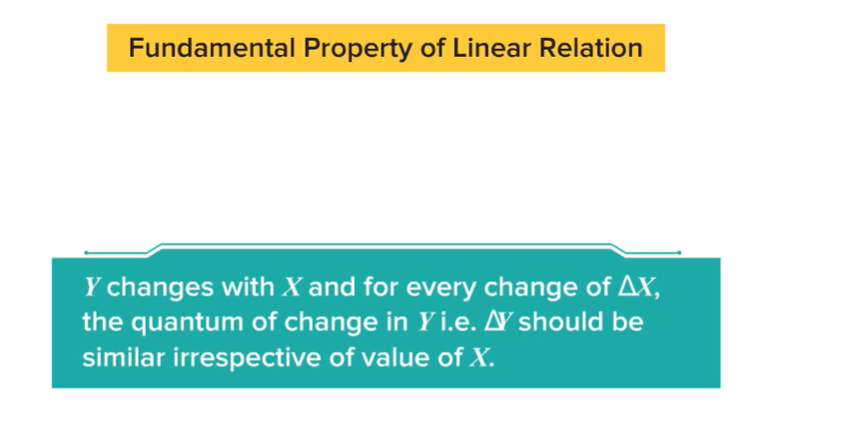

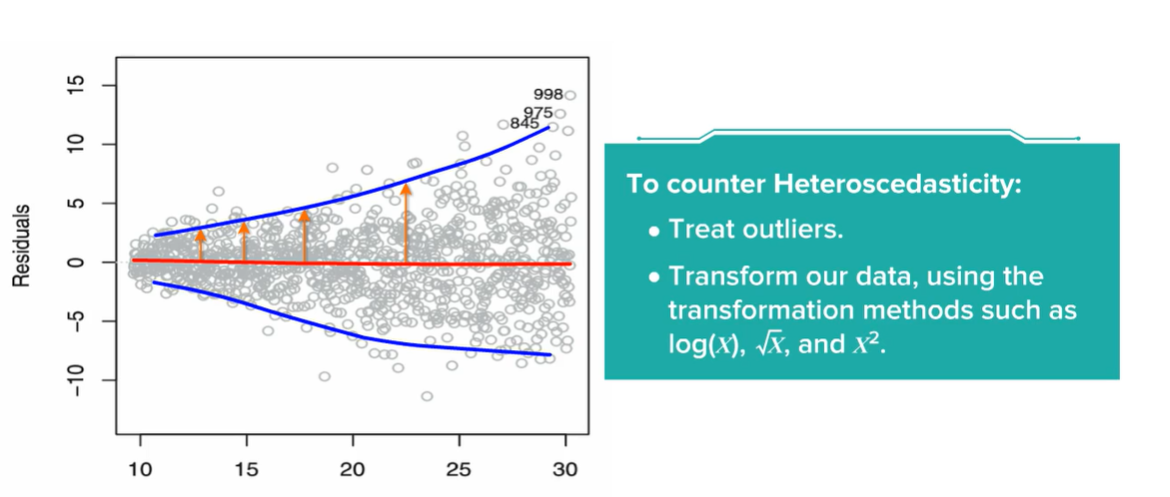

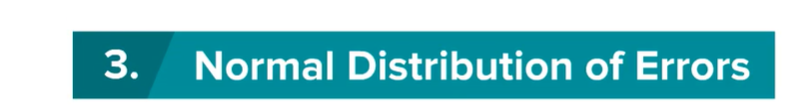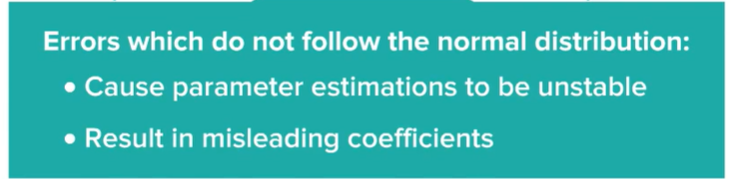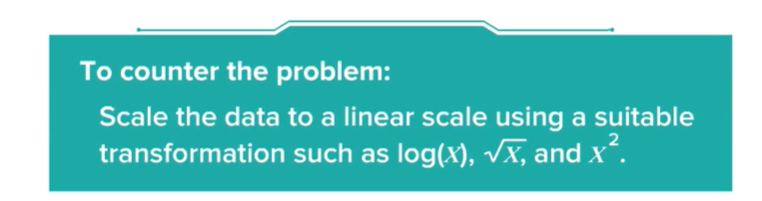

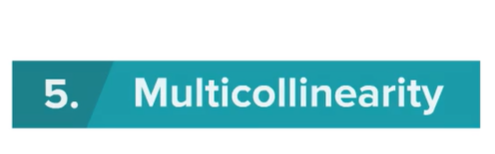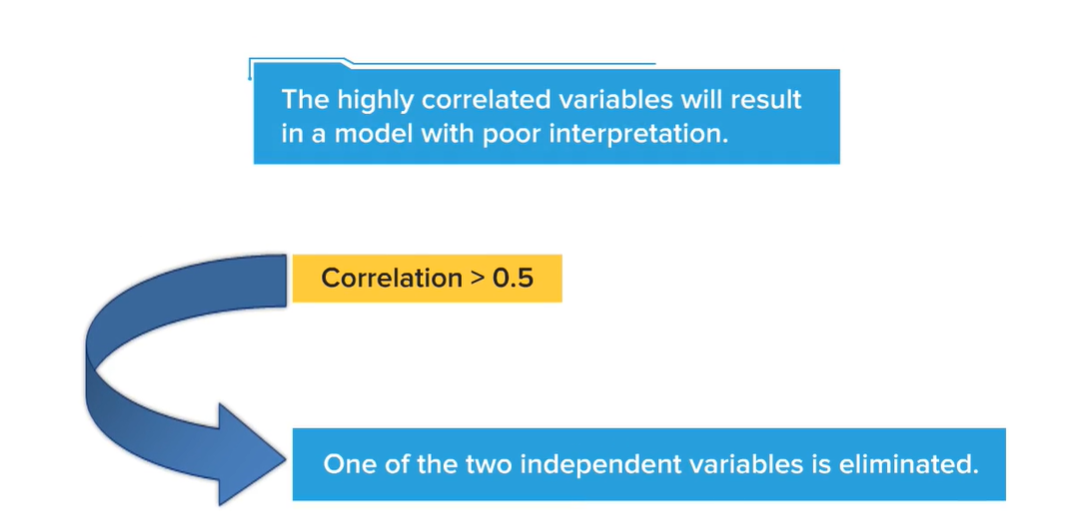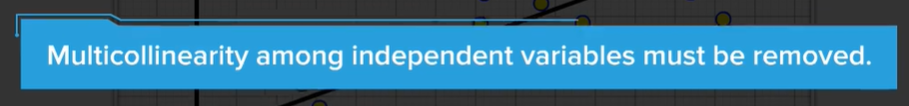